# SIMPLE NEURAL NETWORK

In [4]:
import numpy as np
import pandas as pd
import math

In [5]:
''' sigmoid function helps normalize the weighted sum of the inputs and gives values between 0 and 1
    sigmoid function is given by: 1/(1+exp(-x)) but in this '-x' becomes '-(summation of x*weights)'
    the error = actual outputs - obtained outputs
    adjustment = error*inputs*derivative_of_sigmoid function of output

'''

" sigmoid function helps normalize the weighted sum of the inputs and gives values between 0 and 1\n    sigmoid function is given by: 1/(1+exp(-x)) but in this '-x' becomes '-(summation of x*weights)'\n    the error = actual outputs - obtained outputs\n    adjustment = error*inputs*derivative_of_sigmoid function of output\n\n"

In [6]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

In [25]:
training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])
training_outputs = np.array([[0,1,1,0]]).T

In [26]:
np.random.seed(1)

synaptic_weights = 2*np.random.random((3,1)) - 1
print('synaptic weights before training are: ',synaptic_weights)

synaptic weights before training are:  [[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [27]:
# print('Starting synaptic weights are; ',synaptic_weights)

In [31]:
for x in range(50000):
    input_layer = training_inputs
    
    outputs = sigmoid(np.dot(input_layer,synaptic_weights))
    
    error = training_outputs - outputs
    
    adjustment = error*sigmoid_derivative(outputs)
    
    synaptic_weights += np.dot(input_layer.T,adjustment)
    
#print('error',error)
#print('sigmoid derivative of outputs',sigmoid_derivative(outputs))
print('synaptic weights after training are: ',synaptic_weights)
print(' outputs are: ',outputs)

synaptic weights after training are:  [[12.10471586]
 [-0.2043345 ]
 [-5.8483515 ]]
 outputs are:  [[0.00287637]
 [0.99765243]
 [0.99808546]
 [0.00234603]]


In [1]:
import math

In [3]:
math.exp(1)

2.718281828459045

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df1 = pd.read_excel('DataSet1.xlsx')
df2 = pd.read_excel('DataSet2.xlsx')
df3 = pd.read_excel('DataSet3.xlsx')
df = pd.concat([df1,df2,df3],axis=0)

In [8]:
#df.head()
df.reset_index(drop=True)
df.drop('S/N',axis=1,inplace=True)
df.head()

,Va,Vb,Vc,Ia,Ib,Ic,Fault type
0,1.003,1.004,0.997,0.993,0.998,1.001,No fault
1,0.225,1.112,1.105,4.331,0.986,0.997,A-to-Gnd
2,1.115,0.334,1.103,0.991,5.221,1.002,B-to-Gnd
3,1.113,0.996,0.442,0.987,0.995,3.332,C-to-Gnd
4,0.553,0.336,0.986,4.448,4.448,1.006,A-to-B


In [106]:
test = pd.read_excel('data.xlsx')
test.drop('S/N',axis=1,inplace=True)
test.head()

,Va,Vb,Vc,Ia,Ib,Ic,Fault type
0,0.995,0.991,0.993,0.997,0.994,0.992,No fault
1,0.321,1.184,1.179,3.521,0.989,0.983,A-to-Gnd
2,1.173,0.334,1.194,0.982,3.336,0.985,B-to-Gnd
3,1.192,1.172,0.336,0.981,0.979,3.337,C-to-Gnd
4,0.471,0.625,0.987,5.421,5.421,0.984,A-to-B


In [107]:
df['sep'] = 'train'
test['sep'] = 'test'
data = pd.concat([df,test],axis=0)

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [109]:
data['Fault type'] = le.fit_transform(data['Fault type'])


In [110]:
le.classes_

array(['A-to-B', 'A-to-B-Gnd', 'A-to-B-to-C', 'A-to-C', 'A-to-C-Gnd',
       'A-to-Gnd', 'B-to-C', 'B-to-C-Gnd', 'B-to-Gnd', 'C-to-Gnd',
       'No fault'], dtype=object)

In [21]:
data.head()

,Va,Vb,Vc,Ia,Ib,Ic,Fault type,sep
0,1.003,1.004,0.997,0.993,0.998,1.001,10,train
1,0.225,1.112,1.105,4.331,0.986,0.997,5,train
2,1.115,0.334,1.103,0.991,5.221,1.002,8,train
3,1.113,0.996,0.442,0.987,0.995,3.332,9,train
4,0.553,0.336,0.986,4.448,4.448,1.006,0,train


In [28]:
train = data[data['sep'] == 'train']
test = data[data['sep'] == 'test']

In [32]:
train.drop('sep',axis=1,inplace=True)
test.drop('sep',axis=1,inplace=True)

C:\Users\Kuz\Documents\anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [48]:
test.head()

,Va,Vb,Vc,Ia,Ib,Ic,Fault type
0,0.995,0.991,0.993,0.997,0.994,0.992,10
1,0.321,1.184,1.179,3.521,0.989,0.983,5
2,1.173,0.334,1.194,0.982,3.336,0.985,8
3,1.192,1.172,0.336,0.981,0.979,3.337,9
4,0.471,0.625,0.987,5.421,5.421,0.984,0


In [57]:
get_columns = train.columns
get_columns

Index(['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic', 'Fault type'], dtype='object')

In [64]:
x_train = train[[x for x in get_columns if x != 'Fault type']].values
y_train = train['Fault type'].values

In [65]:
x_test = test[[x for x in get_columns if x != 'Fault type']].values
y_test = test['Fault type'].values

In [67]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(32, 6) (32,) (10, 6) (10,)


In [68]:
from sklearn.preprocessing import StandardScaler

In [71]:
# x_train = StandardScaler.fit_transform(x_train)
# y_train = StandardScaler.fit_transform(y_train)

In [72]:
from sklearn.neural_network import MLPClassifier

In [79]:
clf = MLPClassifier(alpha=1,max_iter=1000).fit(x_train,y_train)

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,classification_report,roc_auc_score

In [81]:
score = clf.score(x_test,y_test)
prediction = clf.predict(x_test)

In [82]:
prediction

array([10,  5,  8,  9,  0,  6,  3,  1,  7,  3], dtype=int64)

In [83]:
score

0.9

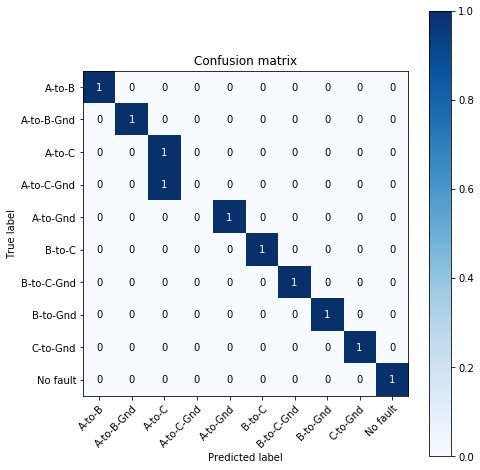

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, prediction, classes, title=None, cmap=plt.cm.Blues):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, prediction)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, prediction)]

    fig, ax = plt.subplots(figsize=(7, 7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, prediction, le.classes_, title='Confusion matrix')

plt.show()

In [112]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

def plot_curve(estimator, model_name, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), curve='train'):
    plt.figure()
    
    if curve == 'train':
        plt.title('Training Curve with ' + model_name)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
        plt.legend(loc="best")
    else:
        plt.title('Validation Curve with ' + model_name)
        param_range = np.logspace(-6, -1, 5)
        train_scores, test_scores = validation_curve(
            estimator, X, y, "alpha", param_range=param_range,
            cv=cv, scoring="accuracy", n_jobs=1)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.xlabel(r"$\gamma$")
        plt.ylabel("Score")
        plt.ylim(0.0, 1.1)
        lw = 2
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
        plt.fill_between(param_range, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="darkorange", lw=lw)
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        plt.fill_between(param_range, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="navy", lw=lw)
        plt.legend(loc="best")
    
    return plt

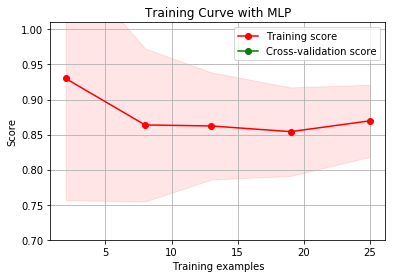

In [113]:
title = "MLP"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = MLPClassifier(alpha=1, max_iter=1000)
plot_curve(estimator, title, x_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4, curve='train')
plt.show()